### Desafío Data Wrangling - API Pública 

Maylen Paz Idrovo  
Coderhouse

In [1]:
# Introducción

In [2]:
# Mi proyecto se enfoca en la fuga de clientes de una industria bancaria. A pesar de no encontrar una API específica para mi 
# tema, me enfoqué en aquellos factores que pueden tener un impacto significativo en la banca. En este caso, escogí la tasa de 
# interés real y la inflación (precios del consumidor %). El primer indicador se refiere a la tasa de interés ajustada por la 
# inflación, lo que significa que tiene en cuenta el efecto de la inflación en el poder adquisitivo de una determinada cantidad 
# de dinero. Recordemos que una tasa de interés alta puede desincentivar el consumo y la inversión, lo cual podría afectar la 
# demanda de préstamos y servicios bancarios.

# La API utilizada es http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL y según la documentación no se requiere una
# cuenta para poder acceder a la información, sólo hay que modificar qué país e indicador se va a utilizar. En mi caso, se
# analizará la información de Estados Unidos (USA).

In [3]:
# Importamos los paquetes
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import requests
import json
print('Setup Complete')

Setup Complete


In [4]:
# Realizamos la solicitud para obtener datos de la API de World Bank
url = 'https://api.worldbank.org/v2/country/USA/indicator/FR.INR.RINR?format=json'
df = requests.get(url)
print(df)
print(len(df.text))
df.text

<Response [200]>
10827


'[{"page":1,"pages":2,"per_page":50,"total":63,"sourceid":"2","lastupdated":"2023-06-29"},[{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate (%)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2022","value":null,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate (%)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2021","value":-1.18935690125342,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate (%)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2020","value":2.2104106796787,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate (%)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2019","value":3.42708988830508,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FR.INR.RINR","value":"Real interest rate 

In [5]:
# Convertimos el contenido de la respuesta HTTP a JSON
jsondata = json.loads(df.text)
data_list = jsondata[1]
df_wb = pd.json_normalize(data_list)
df_wb

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,USA,2022,NaN,,,1,FR.INR.RINR,Real interest rate (%),US,United States
1,USA,2021,-1.189357,,,1,FR.INR.RINR,Real interest rate (%),US,United States
2,USA,2020,2.210411,,,1,FR.INR.RINR,Real interest rate (%),US,United States
3,USA,2019,3.427090,,,1,FR.INR.RINR,Real interest rate (%),US,United States
4,USA,2018,2.441415,,,1,FR.INR.RINR,Real interest rate (%),US,United States
5,USA,2017,2.156099,,,1,FR.INR.RINR,Real interest rate (%),US,United States
6,USA,2016,2.484530,,,1,FR.INR.RINR,Real interest rate (%),US,United States
7,USA,2015,2.237075,,,1,FR.INR.RINR,Real interest rate (%),US,United States
8,USA,2014,1.354776,,,1,FR.INR.RINR,Real interest rate (%),US,United States
9,USA,2013,1.473254,,,1,FR.INR.RINR,Real interest rate (%),US,United States


In [6]:
# Asimismo replicaremos el proceso previo pero con otro indicador
url1 = 'https://api.worldbank.org/v2/country/USA/indicator/FP.CPI.TOTL.ZG?format=json'
df1 = requests.get(url1)
print(df1)
print(len(df1.text))
df1.text

<Response [200]>
11740


'[{"page":1,"pages":2,"per_page":50,"total":63,"sourceid":"2","lastupdated":"2023-06-29"},[{"indicator":{"id":"FP.CPI.TOTL.ZG","value":"Inflation, consumer prices (annual %)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2022","value":8.00279982052117,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FP.CPI.TOTL.ZG","value":"Inflation, consumer prices (annual %)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2021","value":4.69785886363739,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FP.CPI.TOTL.ZG","value":"Inflation, consumer prices (annual %)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2020","value":1.23358439630637,"unit":"","obs_status":"","decimal":1},{"indicator":{"id":"FP.CPI.TOTL.ZG","value":"Inflation, consumer prices (annual %)"},"country":{"id":"US","value":"United States"},"countryiso3code":"USA","date":"2019","value":1.81221007526015,"unit":"","obs_s

In [7]:
# Convertimos el contenido de la respuesta HTTP a JSON
jsondata = json.loads(df1.text)
data_list = jsondata[1]
df1_wb = pd.json_normalize(data_list)
df1_wb

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,USA,2022,8.002800,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
1,USA,2021,4.697859,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
2,USA,2020,1.233584,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
3,USA,2019,1.812210,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
4,USA,2018,2.442583,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
5,USA,2017,2.130110,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
6,USA,2016,1.261583,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
7,USA,2015,0.118627,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
8,USA,2014,1.622223,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
9,USA,2013,1.464833,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States


In [8]:
# Unimos los DataFrames por filas y reseteamos los índices
combinados_df = pd.concat([df_wb, df1_wb], axis=0)
combinados_df.reset_index(drop=True, inplace=True)
combinados_df

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,USA,2022,NaN,,,1,FR.INR.RINR,Real interest rate (%),US,United States
1,USA,2021,-1.189357,,,1,FR.INR.RINR,Real interest rate (%),US,United States
2,USA,2020,2.210411,,,1,FR.INR.RINR,Real interest rate (%),US,United States
3,USA,2019,3.427090,,,1,FR.INR.RINR,Real interest rate (%),US,United States
4,USA,2018,2.441415,,,1,FR.INR.RINR,Real interest rate (%),US,United States
...,...,...,...,...,...,...,...,...,...,...
95,USA,1977,6.501684,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
96,USA,1976,5.744813,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
97,USA,1975,9.143147,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
98,USA,1974,11.054805,,,1,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States


In [9]:
# Copia del df original
df_copia = combinados_df.copy()

# Eliminamos algunas columnas que no presentan información
eliminar_columnas = ['unit', 'obs_status', 'decimal']
df_copia = df_copia.drop(columns = eliminar_columnas)

# Modificamos el nombre de la columna 'countryiso3code'
df_copia = df_copia.rename(columns={'countryiso3code': 'Country_Code',
                                    'date': 'Year',
                                    'value': 'Value',
                                    'indicator.id': 'Indicator_ID',
                                    'indicator.value': 'Indicator',
                                    'country.id': 'Country_ID',
                                    'country.value': 'Country_Value'})
df_copia

,Country_Code,Year,Value,Indicator_ID,Indicator,Country_ID,Country_Value
0,USA,2022,NaN,FR.INR.RINR,Real interest rate (%),US,United States
1,USA,2021,-1.189357,FR.INR.RINR,Real interest rate (%),US,United States
2,USA,2020,2.210411,FR.INR.RINR,Real interest rate (%),US,United States
3,USA,2019,3.427090,FR.INR.RINR,Real interest rate (%),US,United States
4,USA,2018,2.441415,FR.INR.RINR,Real interest rate (%),US,United States
...,...,...,...,...,...,...,...
95,USA,1977,6.501684,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
96,USA,1976,5.744813,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
97,USA,1975,9.143147,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States
98,USA,1974,11.054805,FP.CPI.TOTL.ZG,"Inflation, consumer prices (annual %)",US,United States


In [10]:
print(f'Shape del DataFrame: {df_copia.shape}')
print(f'Cantidad de datos del DataFrame: {df_copia.size}')

Shape del DataFrame: (100, 7)
Cantidad de datos del DataFrame: 700


In [11]:
# Resumen de la data
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country_Code   100 non-null    object 
 1   Year           100 non-null    object 
 2   Value          99 non-null     float64
 3   Indicator_ID   100 non-null    object 
 4   Indicator      100 non-null    object 
 5   Country_ID     100 non-null    object 
 6   Country_Value  100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [12]:
# Descripción del dataset

# Country_Code: Código abreviado del país (cadena de texto)
# Year: Año de análisis (entero)
# Value: Valor en porcentaje (float)
# Indicator_ID: Código único del Indicador (cadena de texto)
# Indicator: Indicador Financiero (cadena de texto) 
# Country_ID: Identificador único del país (cadena de texto)
# Country_Value: País de análisis (cadena de texto)

In [13]:
# Modificamos el tipo de dato de la columna 'Year'
df_copia['Year'] = df_copia['Year'].astype('int64')
df_copia.dtypes

Country_Code      object
Year               int64
Value            float64
Indicator_ID      object
Indicator         object
Country_ID        object
Country_Value     object
dtype: object

In [14]:
# Agrupamos los datos por Indicador
grouped = df_copia['Value'].groupby(df_copia['Indicator'])
type(grouped)

pandas.core.groupby.generic.SeriesGroupBy

In [15]:
# Verificamos si hay presencia de outliers
def obtener_outliers(grouped):
    outliers = []
    for indicator, grupo in grouped:
        q1, q3 = np.percentile(grupo, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers.extend(grupo[grupo < lower_bound] + grupo[grupo > upper_bound])
    return outliers

outliers = obtener_outliers(grouped)
outliers

[nan, nan, nan, nan, nan]

In [16]:
# Los resultados indican que no hay valores atípicos ya que nos arrojó una lista vacía.

In [17]:
# Obtenemos la media de los datos históricos por Indicador
grouped.mean()

Indicator
Inflation, consumer prices (annual %)    4.008567
Real interest rate (%)                   3.933778
Name: Value, dtype: float64

In [18]:
# Vemos que en promedio la inflación medida por el índice de precios al consumidor en USA ha sido del 4.01% y la tasa de interés
# real presenta una media del 3.93% lo cual suena atractivo al consumidor en términos de ahorro ya que los intereses serán altos
# pero para la banca podría convertirse en un problema porque será más caro para las empresas pedir prestado dinero, lo que
# puede ralentizar el crecimiento económico.

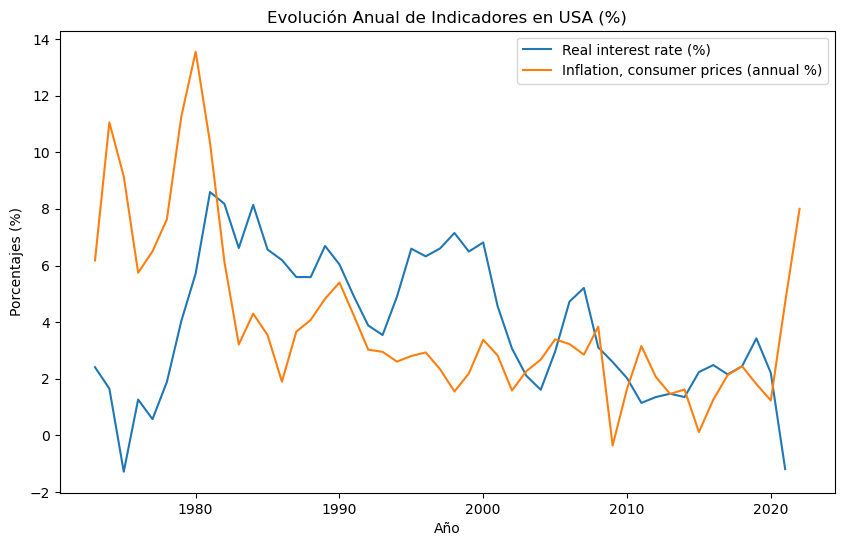

In [19]:
# Graficamos
fig, ax = plt.subplots(figsize=(10, 6))

indicadores = df_copia['Indicator'].unique()

# Iteramos sobre los indicadores y trazamos el lineplot correspondiente
for indicador in indicadores:
    data = df_copia[df_copia['Indicator'] == indicador]
    ax.plot(data['Year'], data['Value'], label=indicador)

# Título y etiquetas de los ejes
ax.set_title('Evolución Anual de Indicadores en USA (%)')
ax.set_xlabel('Año')
ax.set_ylabel('Porcentajes (%)')
ax.legend()
             
plt.show()